### Importation des données

In [52]:
#=======================================================IMPORTATION DES LIBRAIRIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss
import sklearn.metrics
from scipy import stats as st

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import missingno as msno


# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


import matplotlib.pyplot as plt
from fanalysis.mca import MCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [53]:
#=======================================================IMPORTATION DE LA BASE DE DONNEES ET VUE DES 5 PREMIERES LIGNES
df=pd.read_excel('DataBank.xlsx')
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [54]:
#=======================================================DIMENSIONS DE LA BASE DE DONNEES
print("Dimensions de la base de données (lignes, colonnes) :", df.shape)

Dimensions de la base de données (lignes, colonnes) : (5000, 23)


In [55]:
#Retirons la variable Customer_ID 
df=df.drop("Customer_ID",axis=1)

### STATISTIQUES DESCRIPTIVES

#### ANALYSE DE LA VARIABLE CIBLE

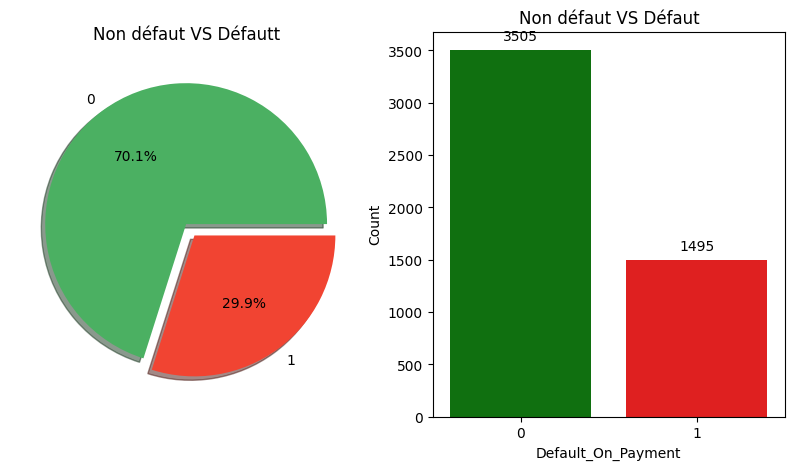

In [56]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
a, b = [plt.cm.Greens, plt.cm.Reds]
df['Default_On_Payment'].value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], autopct='%.1f%%', shadow=True, colors=[a(0.6), b(0.6)])
ax[0].set_title('Non défaut VS Défautt')
ax[0].set_ylabel('')
sns.countplot(x='Default_On_Payment', data=df, palette=['green', 'red'], ax=ax[1])
ax[1].set_title('Non défaut VS Défaut')
ax[1].set_ylabel('Count')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### STATISTIQUES DESCRIPTIVES DES VARIABLES EXPLICATIVES

##### ANALYSE DES VARIABLES QUANTITATIVES

In [57]:
info_df_num = df.describe()
info_df_num

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.299000,1.0
std,12.053989,2821.607329,1.118267,1.103276,11.370917,0.577423,0.361941,0.457866,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,1.0
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.0
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.0
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.0
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.0


In [58]:
num_col=['Duration_in_Months', 'Inst_Rt_Income',
       'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents',
       'Default_On_Payment', 'Count']
df_num=df[num_col]
fig = go.Figure()
for col in set(df_num.columns) :
    fig.add_trace(go.Box(x=df_num[col], name=col))
fig.update_layout(
    title_text="Box Plot Styling Outliers",
    title_font=dict(color='orange', family='newtimeroman', size=25),
    title_x=0.45,
    paper_bgcolor='#080114',
    # plot_bgcolor='#DAF7A6',
    font=dict(color='orange', family='newtimeroman', size=16),
    )
fig.show()

In [59]:
#=======================================================VALEURS MANQUANTES POUR LES VARIABLES NUMERIQUES
info_df_num_2 = pd.DataFrame({
    'variables': info_df_num.columns.tolist(),
    'Nb value distinct': df[info_df_num.columns].nunique(),
    'Nb value missing': df[info_df_num.columns].isnull().sum(),
})

info_df_num_2['%Modalité_missing'] = info_df_num_2['Nb value missing'] / len(df)
info_df_num_2

,variables,Nb value distinct,Nb value missing,%Modalité_missing
Duration_in_Months,Duration_in_Months,33,0,0.0
Credit_Amount,Credit_Amount,921,0,0.0
Inst_Rt_Income,Inst_Rt_Income,4,0,0.0
Current_Address_Yrs,Current_Address_Yrs,4,0,0.0
Age,Age,53,0,0.0
Num_CC,Num_CC,4,0,0.0
Dependents,Dependents,2,0,0.0
Default_On_Payment,Default_On_Payment,2,0,0.0
Count,Count,1,0,0.0


##### ANALYSE DES VARIABLES QUALITATIVES

In [60]:
#=======================================================STATISTIQUES DESCRIPTIVES DES VARIABLES QUALITATIVES
list_var_cat = df.select_dtypes(include='object').columns.tolist()

info_df_cat = pd.DataFrame({
    'variables': list_var_cat,
    'Nb value distinct': df[list_var_cat].nunique().values,
    'Nb value missing': df[list_var_cat].isnull().sum().values
})

info_df_cat

,variables,Nb value distinct,Nb value missing
0,Status_Checking_Acc,4,0
1,Credit_History,5,0
2,Purposre_Credit_Taken,10,0
3,Savings_Acc,5,0
4,Years_At_Present_Employment,5,0
5,Marital_Status_Gender,4,0
6,Other_Debtors_Guarantors,3,0
7,Property,4,0
8,Other_Inst_Plans,3,0
9,Housing,3,0


##### ANALYSE DE LA DISTRIBUTION DES DEFAUTS DE PAYEMENT EN FONCTION DES VARIABLES QUALITATIVES

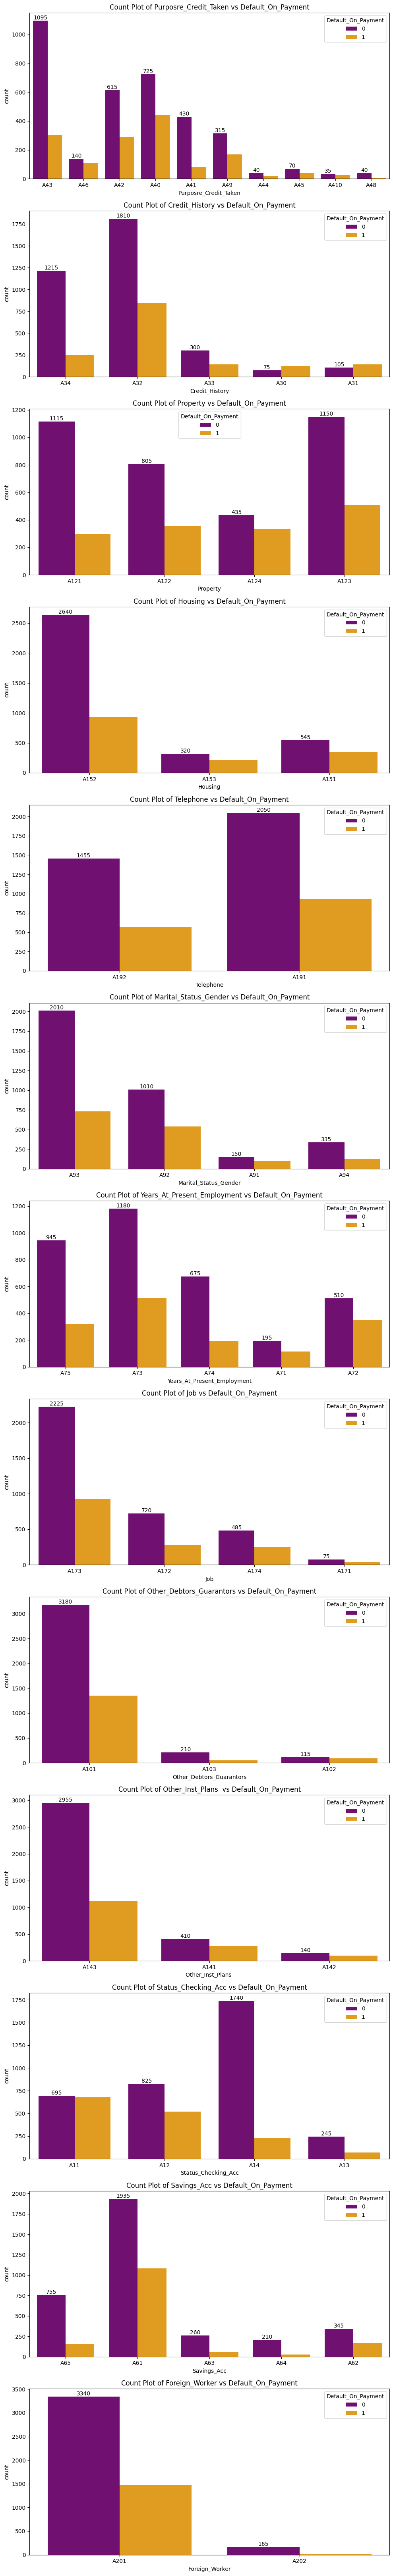

In [61]:
# Diagrammes à barres de la variable d'intérêt et features catégorielles
columns_only_in_df = list(set(df.columns).difference(info_df_num.columns))
cat_features = df[columns_only_in_df].columns
sns.set_palette(['purple', 'orange', 'blue', 'pink'])
fig, ax = plt.subplots(len(cat_features), 1, figsize=(10, len(cat_features) * 5))

for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=str(col), hue='Default_On_Payment', ax=ax[i])
    ax[i].bar_label(ax[i].containers[0])
    ax[i].set_title(f'Count Plot of {col} vs Default_On_Payment')

plt.tight_layout()
plt.show()


##### ETUDES DES CORRELATIONS

In [62]:
#==============================================TYPE DES VARIABLES
df = df.drop("Count", axis=1)

#==============================================CORRECTION DU TYPE DES VARIABLES
num_var = ["Duration_in_Months","Credit_Amount","Inst_Rt_Income","Current_Address_Yrs","Age","Num_CC","Dependents"]
df_cat = df[cat_features]
df_cat = df_cat.astype("category")
df_num = df[num_var]
df_num = df_num.astype("int")

<Axes: >

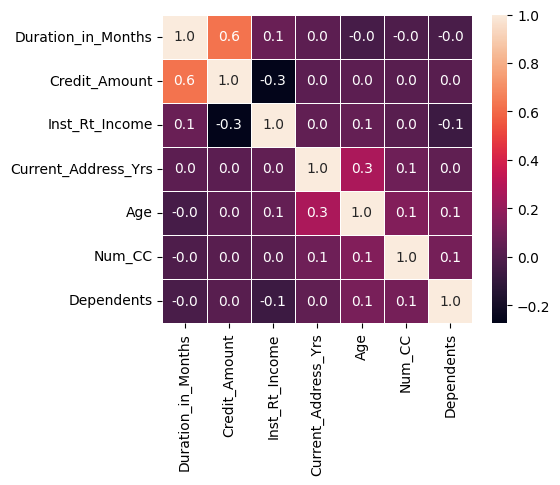

In [63]:
#======================================================= VARIABLES QUANTITATIVES: CORRELATION DE PEARSON
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [64]:
#======================================================= VERIFICATION AVANT LE KHI DEUX QUE TOUTES LES MODALITES AU PLUS DE 5 OBS

threshold = 5  # Seuil d'effectif minimum de 5 observations

for col in cat_features:
    frequencies = df[col].value_counts()
    low_frequency_modalities = frequencies[frequencies < threshold].index.tolist()
    
    if len(low_frequency_modalities) > 0:
        print(f"Les modalités suivantes de la variable '{col}' ont moins de 5 observations:")
        print(low_frequency_modalities)
    else :
        print(f"Acune modalité n'a moins de 5 observations!!!!!")



Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!
Acune modalité n'a moins de 5 observations!!!!!


In [65]:
#======================================================= VARIABLES QUALITATIVES ET VARIABLE D'INTERET: TEST DE KHI 2
target='Default_On_Payment'
chi2_results = []
for col in cat_features:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi2_results.append((col, chi2, p_value))

chi2_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi2', 'P-value'])

chi2_df


,Variable,Chi2,P-value
0,Purposre_Credit_Taken,170.911315,3.985377e-32
1,Credit_History,308.168081,1.873780e-65
2,Property,123.047342,1.702444e-26
3,Housing,93.049827,6.229983e-21
4,Telephone,5.867908,1.541937e-02
5,Marital_Status_Gender,45.708590,6.541125e-10
6,Years_At_Present_Employment,91.739895,5.621205e-19
7,Job,9.685015,2.144243e-02
8,Other_Debtors_Guarantors,33.298108,5.880412e-08
9,Other_Inst_Plans,65.508170,5.957742e-15


In [66]:
#======================================================= VARIABLES QUANTITATIVES ET VARIABLE D'INTERET: TEST DE STUDENT
results = pd.DataFrame(columns=['Variable', 'Test Student', 'p-value'])

for v in df_num.columns.tolist():
    if v != target:
        group_0 = df.loc[df[target] == 0, v]
        group_1 = df.loc[df[target] == 1, v]
        st_test, st_p = st.ttest_ind(group_0, group_1, axis=0, equal_var=False, nan_policy='omit')
        results = pd.concat([results, pd.DataFrame({'Variable': [v], 'Test Student': [st_test], 'p-value': [st_p]})])

results


,Variable,Test Student,p-value
0,Duration_in_Months,-14.187994,5.823408e-44
0,Credit_Amount,-9.415290,1.193824e-20
0,Inst_Rt_Income,-5.350224,9.464710e-08
0,Current_Address_Yrs,-0.329882,7.415133e-01
0,Age,6.328511,2.863691e-10
0,Num_CC,3.185259,1.461402e-03
0,Dependents,0.147453,8.827846e-01


### MODELISATION 1

#### PREPARATION AVEC ENCODAGE

In [67]:
encoded = pd.get_dummies(df_cat)
encoded

,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A46,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,...,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Foreign_Worker_A201,Foreign_Worker_A202
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4996,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4997,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [68]:
#==============================================CONCATENATION DES VARIABLES NUMERIQUES ET CATEGORIELLES
dff = pd.concat([df_num,encoded,df["Default_On_Payment"]],axis=1)
dff

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,...,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Foreign_Worker_A201,Foreign_Worker_A202,Default_On_Payment
0,6,1169,4,4,67,2,1,False,False,False,...,False,False,False,False,False,False,True,True,False,0
1,48,5951,2,2,22,1,1,False,False,False,...,False,False,True,False,False,False,False,True,False,0
2,12,2096,2,3,49,1,2,False,False,False,...,False,True,True,False,False,False,False,True,False,0
3,42,7882,2,4,45,1,2,False,False,False,...,False,False,True,False,False,False,False,True,False,0
4,24,4870,3,4,53,2,2,True,False,False,...,False,False,True,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,1736,3,4,31,1,1,False,False,False,...,False,True,True,False,False,False,False,True,False,0
4996,30,3857,4,4,40,1,1,False,True,False,...,False,False,True,False,False,False,False,True,False,0
4997,12,804,4,4,38,1,1,False,False,False,...,False,True,True,False,False,False,False,True,False,0
4998,45,1845,4,4,23,1,1,False,False,False,...,False,False,True,False,False,False,False,True,False,1


In [69]:
#==============================================TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dff, dff["Default_On_Payment"],
                                                    test_size=0.3, stratify=dff["Default_On_Payment"])

X_test, X_train = X_test.drop("Default_On_Payment", axis=1), X_train.drop("Default_On_Payment", axis=1) #pas pour H2o

#### REGRESSION LOGISTIQUE

In [70]:
# Building Logistic Regression Classifier ======================================================>
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_LR = lr.predict(X_test)
pred_prob_LR = lr.predict_proba(X_test)

#================================================PROBABILITE DE L'EVENEMENT CIBLE
y_train_predict_lr = lr.predict(X_train)
y_test_predict_lr= lr.predict(X_test)
y_train_predict_proba = lr.predict_proba(X_train)[:,1]
y_test_predict_proba= lr.predict_proba(X_test)[:,1]

In [71]:
print("Score on train set:", lr.score(X_train,y_train), "/ Score on test set:", lr.score(X_test,y_test), "/ Accuracy :",sklearn.metrics.accuracy_score(y_test,lr.predict(X_test)))

Score on train set: 0.7711428571428571 / Score on test set: 0.7573333333333333 / Accuracy : 0.7573333333333333


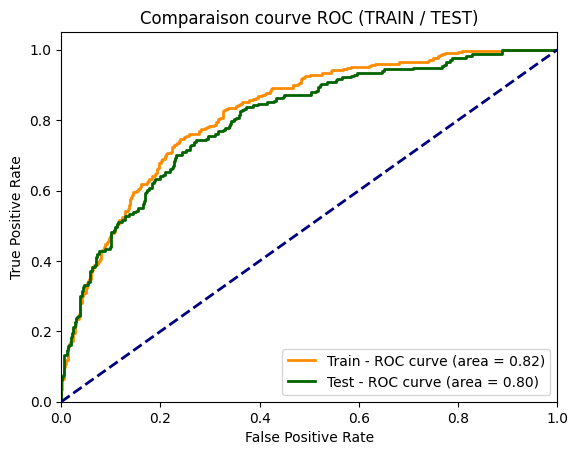

In [72]:
#================================================COURBES ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

#================================================GRAPHES
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

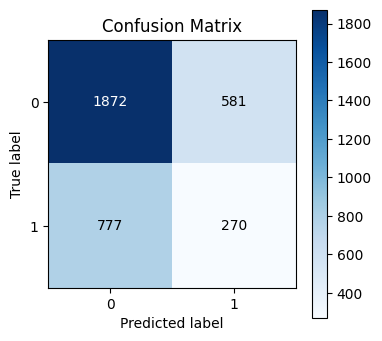

In [73]:
#================================================MATRICE DE CONFUSION SUR BASE TRAIN
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, y_train_predict, figsize=(4, 4))

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

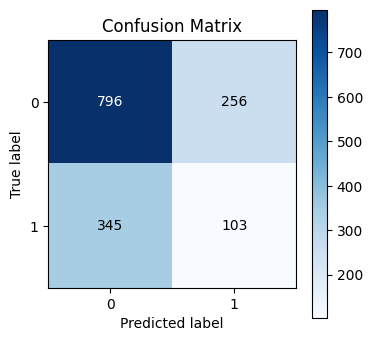

In [74]:
#================================================MATRICE DE CONFUSION SUR BASE TEST
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_test_predict,
    figsize=(4,4))

#### GRADIENT BOOSTING CLASSIFIER

In [75]:
# Building Gradient Boosting Classifier ======================================================>

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#=============================================================================================>

GB_model = GradientBoostingClassifier().fit(X_train, y_train)

pred = GB_model.predict(X_test)
pred_prob = GB_model.predict_proba(X_test)

In [76]:
#================================================PROBABILITE DE L'EVENEMENT CIBLE
y_train_predict = GB_model.predict(X_train)
y_test_predict = GB_model.predict(X_test)
y_train_predict_proba = GB_model.predict_proba(X_train)[:,1]
y_test_predict_proba = GB_model.predict_proba(X_test)[:,1]

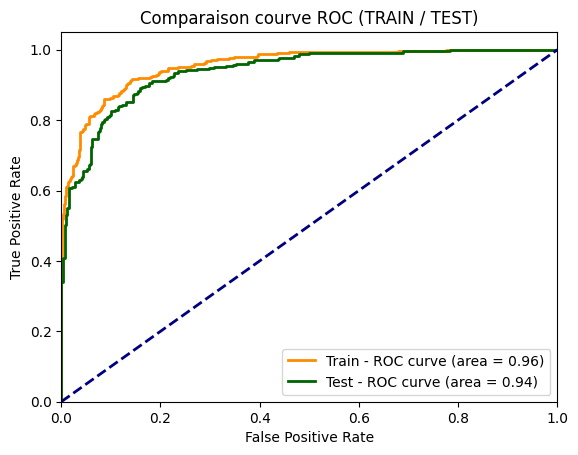

In [77]:
#================================================COURBES ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

#================================================GRAPHES
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

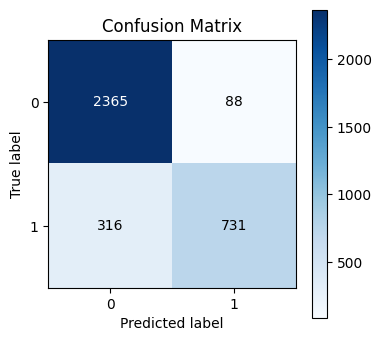

In [78]:
#================================================MATRICE DE CONFUSION SUR BASE TRAIN
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, y_train_predict, figsize=(4, 4))

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

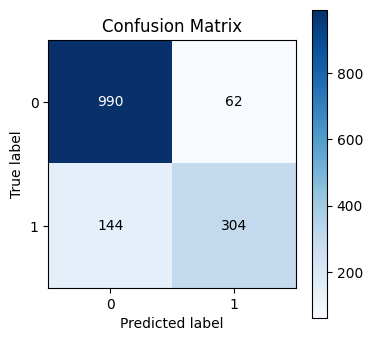

In [79]:
#================================================MATRICE DE CONFUSION SUR BASE TEST
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_test_predict,
    figsize=(4,4))

In [80]:
print("Score on train set:", GB_model.score(X_train,y_train), "/ Score on test set:", GB_model.score(X_test,y_test), "/ Accuracy :",sklearn.metrics.accuracy_score(y_test,GB_model.predict(X_test)))

Score on train set: 0.8845714285714286 / Score on test set: 0.8626666666666667 / Accuracy : 0.8626666666666667


#### KNN

In [81]:
#====================================KNN
from sklearn.neighbors import KNeighborsClassifier
kclf = KNeighborsClassifier(n_neighbors=10 )
knn=kclf.fit(X_train, y_train)
y_pred_knn = kclf.predict(X_test)
print("Score on train set:", kclf.score(X_train,y_train), "/ Score on test set:", kclf.score(X_test,y_test), "/ Accuracy :",sklearn.metrics.accuracy_score(y_test,y_pred_knn))

Score on train set: 0.8162857142857143 / Score on test set: 0.772 / Accuracy : 0.772


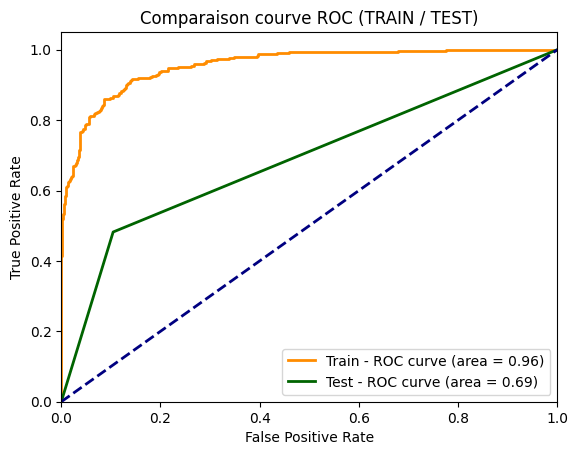

In [82]:
#================================================COURBES ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_knn)
roc_auc_test = auc(fpr_test, tpr_test)

#================================================GRAPHES
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

#### RANDOM FORESTS

In [83]:
#====================================FORET ALEATOIRE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Score on train set:", rf.score(X_train,y_train), "/ Score on test set:", rf.score(X_test,y_test), "/ Accuracy :",sklearn.metrics.accuracy_score(y_test,rf.predict(X_test)))

Score on train set: 1.0 / Score on test set: 0.9966666666666667 / Accuracy : 0.9966666666666667


### MODELISATION AVEC REDUCTION DE DIMENSION ACM

#### ACM

In [84]:
#=================================================================Instanciation de la classe MCA
mca = MCA(row_labels=encoded.index, var_labels=encoded.columns)

In [85]:
#=================================================================Ajustement
mca.fit(encoded.values)

MCA(row_labels=RangeIndex(start=0, stop=5000, step=1),
    var_labels=Index(['Purposre_Credit_Taken_A40', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49'...
       'Other_Debtors_Guarantors_A102', 'Other_Debtors_Guarantors_A103',
       'Other_Inst_Plans _A141', 'Other_Inst_Plans _A142',
       'Other_Inst_Plans _A143', 'Status_Checking_Acc_A11',
       'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Savings_Acc_A61', 'Savings_Acc_A62',
       'Savings_Acc_A63', 'Savings_Acc_A64', 'Savings_Acc_A65',
       'Foreign_Worker_A201', 'Foreign_Worker_A202'],
      dtype='object'))

In [86]:
# ==================================En première ligne, on a les valeurs propres en valeurs absolues.
print(np.round(mca.eig_,2))

[[7.000e-02 5.000e-02 5.000e-02 4.000e-02 4.000e-02 4.000e-02 4.000e-02
  3.000e-02 3.000e-02 3.000e-02 3.000e-02 3.000e-02 3.000e-02 3.000e-02
  2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02
  2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02
  2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 1.000e-02
  1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [6.550e+00 5.170e+00 4.610e+00 4.230e+00 3.810e+00 3.720e+00 3.540e+00
  3.420e+00 3.150e+00 3.000e+00 2.920e+00 2.850e+00 2.700e+00 2.640e+00
  2.440e+00 2.360e+00 2.330e+00 2.280e+00 2.150e+00 2.140e+00 2.090e+00
  2.070e+00 2.030e+00 1.940e+00 1.930e+00 1.890e+00 1.870e+00 1.840e+00
  1.820e+00 1.750e+00 1.710e+00 1.630e+00 1.610e+00 1.530e+00 1.480e+00
  1.410e+00 1.380e+00 1.360e+00 1.250e+00 9.000e-01 4.800e-01 0.000e+00
  0.000e+00

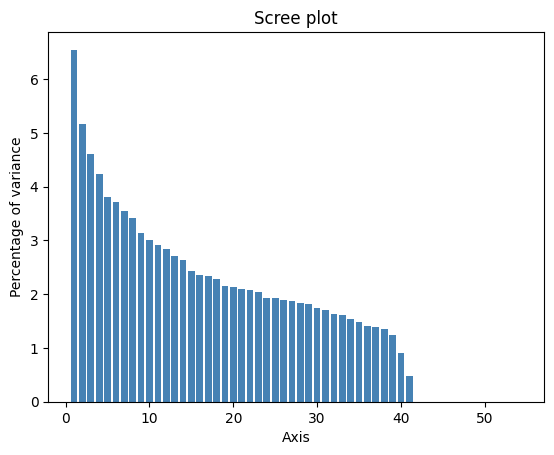

In [87]:
# ==================================En deuxième ligne, on a les valeurs propres en pourcentages de la variance totale.
mca.plot_eigenvalues(type="percentage")

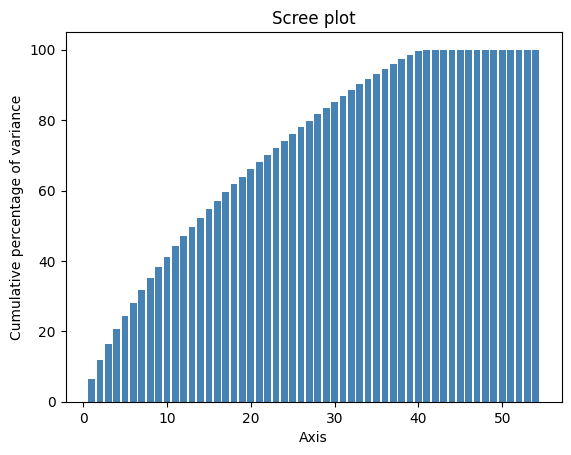

In [88]:
# ==================================En troisième ligne, on a les valeurs propres en pourcentages cumulés de la variance totale.
mca.plot_eigenvalues(type="cumulative")

In [89]:
#Les 40 premiers axes factoriels expliquent 100% de l'inertie totale MAIS PRENDRE 32 AXES QUI EXPLIQUENT A 90%
print(pd.DataFrame(np.transpose(mca.eig_),columns=['Valeurs propres','Pourcentage','% cumulés']))

    Valeurs propres   Pourcentage   % cumulés
0      6.549157e-02  6.549157e+00    6.549157
1      5.169313e-02  5.169313e+00   11.718469
2      4.608813e-02  4.608813e+00   16.327282
3      4.229698e-02  4.229698e+00   20.556980
4      3.813336e-02  3.813336e+00   24.370316
5      3.723510e-02  3.723510e+00   28.093826
6      3.539641e-02  3.539641e+00   31.633466
7      3.418938e-02  3.418938e+00   35.052404
8      3.145861e-02  3.145861e+00   38.198265
9      3.004962e-02  3.004962e+00   41.203227
10     2.921957e-02  2.921957e+00   44.125184
11     2.849385e-02  2.849385e+00   46.974569
12     2.702951e-02  2.702951e+00   49.677520
13     2.640534e-02  2.640534e+00   52.318054
14     2.436282e-02  2.436282e+00   54.754336
15     2.361487e-02  2.361487e+00   57.115823
16     2.329854e-02  2.329854e+00   59.445678
17     2.279907e-02  2.279907e+00   61.725584
18     2.153746e-02  2.153746e+00   63.879330
19     2.141059e-02  2.141059e+00   66.020389
20     2.091310e-02  2.091310e+00 

In [90]:
# =============================================Corrélations des variables par rapport à 2 premiers axes factoriels
cols = mca.col_topandas()
cols[['col_cos2_dim1', 'col_cos2_dim2']]

,col_cos2_dim1,col_cos2_dim2
Purposre_Credit_Taken_A40_False,0.002133,0.027336
Purposre_Credit_Taken_A40_True,0.002133,0.027336
Purposre_Credit_Taken_A41_False,0.109760,0.000283
Purposre_Credit_Taken_A41_True,0.109760,0.000283
Purposre_Credit_Taken_A410_False,0.035672,0.043025
...,...,...
Savings_Acc_A65_True,0.036423,0.042877
Foreign_Worker_A201_False,0.088639,0.056679
Foreign_Worker_A201_True,0.088639,0.056679
Foreign_Worker_A202_False,0.088639,0.056679


In [91]:
##### On va appliquer ensuite l'ACM du package Prince afin de pouvoir extraire les 32 axes principaux
import prince
mca = prince.MCA(n_components=32, n_iter=3, engine='scipy', random_state=42)

mca = mca.fit(encoded)
X = mca.transform(encoded)
X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.087128,-0.401024,-0.422452,0.025555,-0.244022,0.218845,0.104424,-0.080073,0.064718,-0.079651,...,-0.278869,-0.006513,-0.135367,-0.316801,-0.234567,-0.115454,-0.141164,-0.030760,-0.269607,0.104394
1,-0.461207,0.073197,0.015406,0.056439,-0.041143,-0.383146,0.165308,-0.299610,0.236981,-0.060145,...,-0.076167,0.329084,0.112581,-0.030243,0.083495,0.114220,-0.019963,-0.065055,0.015205,0.021179
2,-0.166442,-0.198392,-0.495835,0.228258,-0.038344,-0.012265,-0.295210,0.310713,-0.072092,-0.157654,...,0.319742,-0.460017,-0.216929,-0.034759,0.461901,-0.259018,-0.204746,0.067113,-0.060796,-0.032927
3,-0.019366,0.477714,-0.444203,0.066188,0.475176,0.434681,0.333474,-0.246447,-0.147307,-0.552317,...,0.350430,0.025684,0.116362,0.050014,0.067857,0.092730,-0.013605,-0.129522,-0.096149,-0.079464
4,0.598142,0.299842,-0.425863,0.327419,0.391048,-0.234125,-0.417393,-0.296970,-0.085148,-0.278827,...,-0.455420,0.186175,0.480934,0.240885,-0.277076,0.415080,-0.010630,-0.074245,0.008312,-0.132705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.507173,0.097376,-0.121070,-0.118882,0.007096,0.120629,-0.058719,0.119830,0.005282,-0.126184,...,0.426352,0.069903,0.289215,0.059260,0.389973,0.035917,0.255600,-0.020062,-0.257671,0.219298
4996,0.297034,0.006558,0.316477,-0.428701,0.099341,0.500422,-0.084366,-0.544956,-0.039723,-0.300191,...,-0.275180,-0.379557,-0.315538,0.212783,0.158753,-0.059618,0.046345,-0.233580,0.200303,-0.548610
4997,-0.090325,-0.448494,-0.198922,-0.053116,-0.060193,-0.049129,0.170310,-0.173231,0.295209,0.028939,...,-0.194330,0.066081,0.098829,0.050799,0.041875,-0.162147,-0.119706,-0.298499,0.140926,0.212867
4998,0.607588,0.215706,-0.495558,0.045399,0.343581,-0.250984,0.126291,-0.478503,0.257599,-0.287566,...,-0.023328,0.230584,0.075806,-0.096170,0.027352,0.022760,0.193241,-0.234073,-0.053271,-0.037936


#### PREPARATION

In [92]:
dff_acm = pd.concat([df_num,X,df["Default_On_Payment"]],axis=1)
dff_acm

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,0,1,2,...,23,24,25,26,27,28,29,30,31,Default_On_Payment
0,6,1169,4,4,67,2,1,0.087128,-0.401024,-0.422452,...,-0.006513,-0.135367,-0.316801,-0.234567,-0.115454,-0.141164,-0.030760,-0.269607,0.104394,0
1,48,5951,2,2,22,1,1,-0.461207,0.073197,0.015406,...,0.329084,0.112581,-0.030243,0.083495,0.114220,-0.019963,-0.065055,0.015205,0.021179,0
2,12,2096,2,3,49,1,2,-0.166442,-0.198392,-0.495835,...,-0.460017,-0.216929,-0.034759,0.461901,-0.259018,-0.204746,0.067113,-0.060796,-0.032927,0
3,42,7882,2,4,45,1,2,-0.019366,0.477714,-0.444203,...,0.025684,0.116362,0.050014,0.067857,0.092730,-0.013605,-0.129522,-0.096149,-0.079464,0
4,24,4870,3,4,53,2,2,0.598142,0.299842,-0.425863,...,0.186175,0.480934,0.240885,-0.277076,0.415080,-0.010630,-0.074245,0.008312,-0.132705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,1736,3,4,31,1,1,-0.507173,0.097376,-0.121070,...,0.069903,0.289215,0.059260,0.389973,0.035917,0.255600,-0.020062,-0.257671,0.219298,0
4996,30,3857,4,4,40,1,1,0.297034,0.006558,0.316477,...,-0.379557,-0.315538,0.212783,0.158753,-0.059618,0.046345,-0.233580,0.200303,-0.548610,0
4997,12,804,4,4,38,1,1,-0.090325,-0.448494,-0.198922,...,0.066081,0.098829,0.050799,0.041875,-0.162147,-0.119706,-0.298499,0.140926,0.212867,0
4998,45,1845,4,4,23,1,1,0.607588,0.215706,-0.495558,...,0.230584,0.075806,-0.096170,0.027352,0.022760,0.193241,-0.234073,-0.053271,-0.037936,1


In [204]:
#==============================================TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dff_acm, dff_acm["Default_On_Payment"],
                                                    test_size=0.2, stratify=dff["Default_On_Payment"])

X_train = X_train.drop("Default_On_Payment", axis=1)
X_test = X_test.drop("Default_On_Payment", axis=1)

#### Gradient Boosting Classifier

In [206]:
# Building Gradient Boosting Classifier ======================================================>

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#=============================================================================================>
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

GB_model_acm = GradientBoostingClassifier().fit(X_train, y_train)

pred = GB_model_acm.predict(X_test)
pred_prob = GB_model_acm.predict_proba(X_test)

In [207]:
#================================================PROBABILITE DE L'EVENEMENT CIBLE
y_train_predict = GB_model_acm.predict(X_train)
y_test_predict = GB_model_acm.predict(X_test)
y_train_predict_proba = GB_model_acm.predict_proba(X_train)[:,1]
y_test_predict_proba = GB_model_acm.predict_proba(X_test)[:,1]

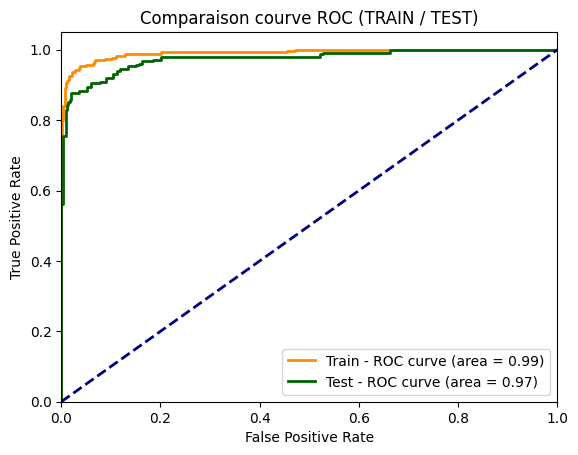

In [208]:
#================================================COURBES ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

#================================================GRAPHES
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

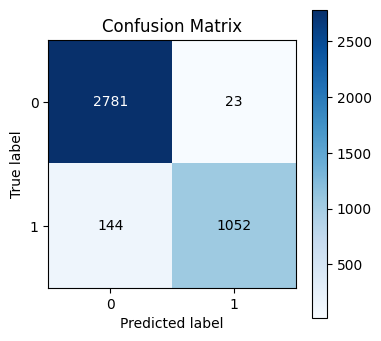

In [209]:
#================================================MATRICE DE CONFUSION SUR BASE TRAIN
skplt.metrics.plot_confusion_matrix(
    y_train, 
    y_train_predict,
    figsize=(4,4))

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

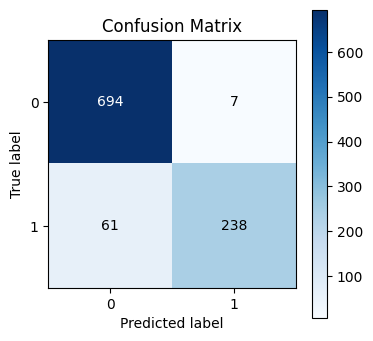

In [210]:
#================================================MATRICE DE CONFUSION SUR BASE TEST
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_test_predict,
    figsize=(4,4))

In [211]:
print("Score on train set:", GB_model_acm.score(X_train,y_train), "/ Score on test set:", GB_model_acm.score(X_test,y_test), "/ Accuracy :",sklearn.metrics.accuracy_score(y_test,GB_model_acm.predict(X_test)))

Score on train set: 0.95825 / Score on test set: 0.932 / Accuracy : 0.932


#### KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier
kclf_acm = KNeighborsClassifier(n_neighbors=10 )
kclf_acm.fit(X_train, y_train)
y_pred_knn = kclf_acm.predict(X_test)
print("Score on train set:", kclf_acm.score(X_train,y_train), "/ Score on test set:", kclf_acm.score(X_test,y_test), "/ Accuracy :",sklearn.metrics.accuracy_score(y_test,y_pred_knn))

Score on train set: 0.80425 / Score on test set: 0.773 / Accuracy : 0.773


### MODELISATION AVEC REDUCTION  PLS